In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


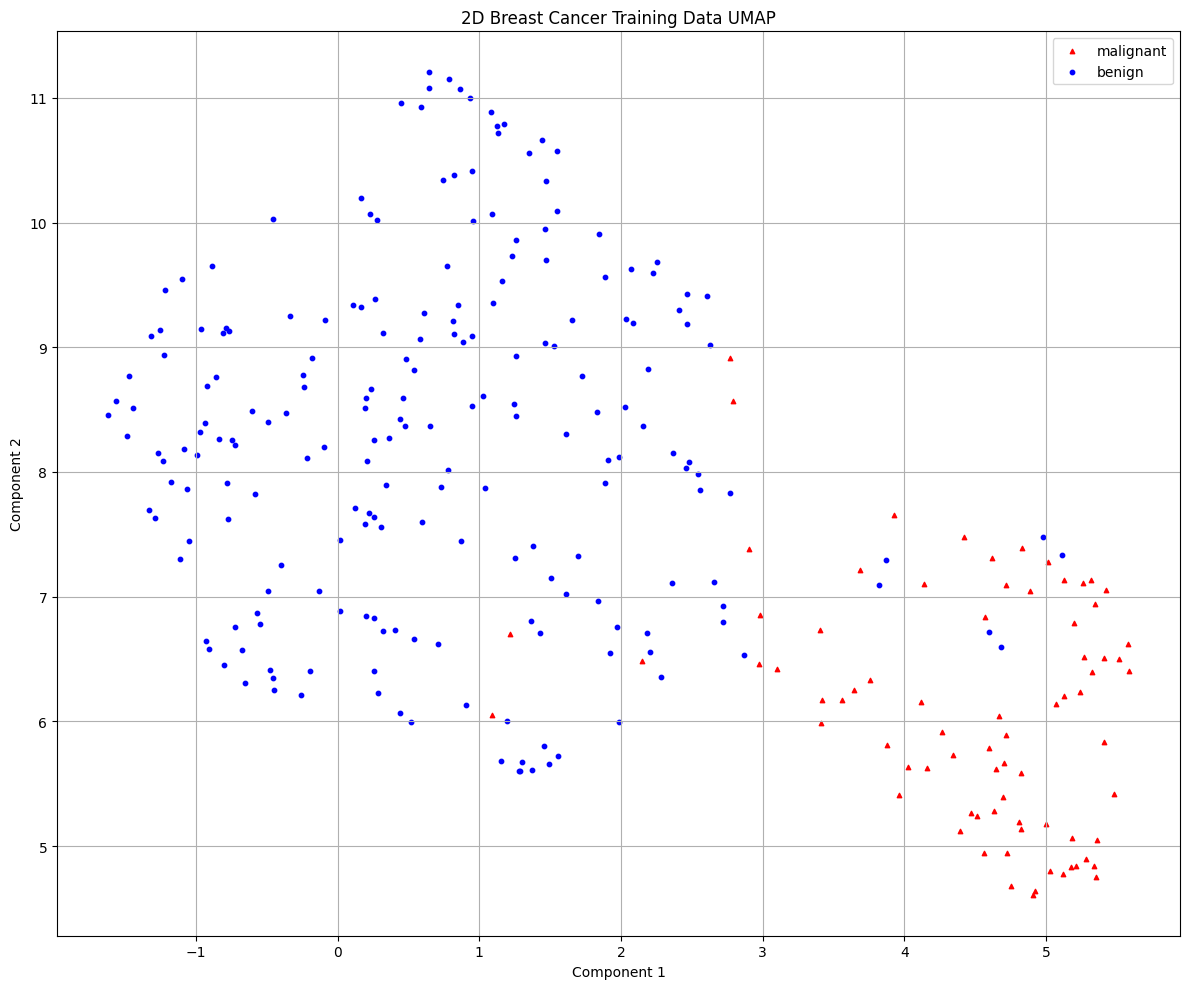

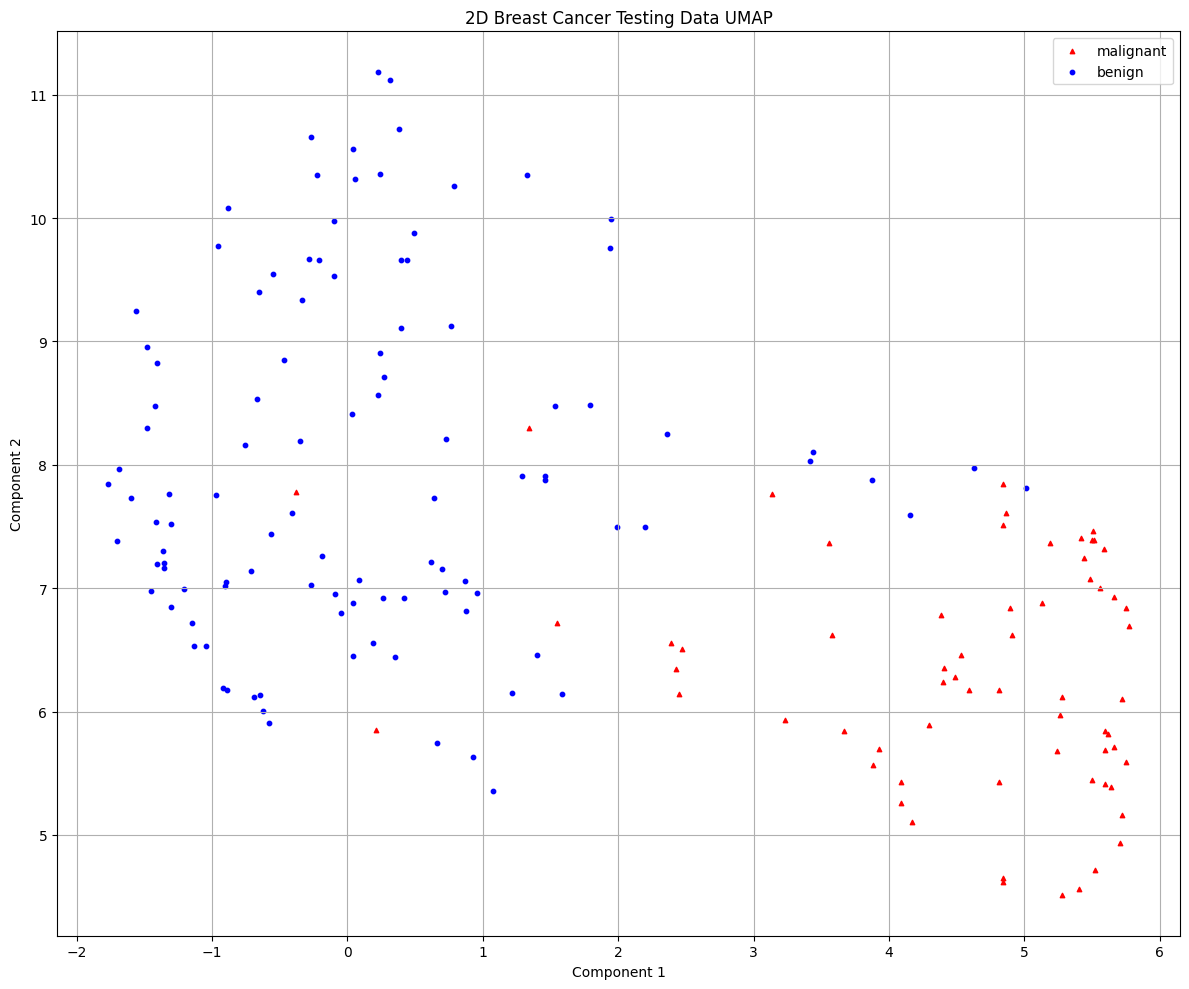

[I 2025-04-27 10:30:44,437] A new study created in memory with name: no-name-0505993f-b14a-44c4-9c2a-36fd0c637edc
[I 2025-04-27 10:30:48,407] Trial 0 finished with value: 0.9510586811857229 and parameters: {'n_estimators': 992, 'max_depth': 26, 'min_samples_split': 14, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9510586811857229.
[I 2025-04-27 10:30:49,939] Trial 1 finished with value: 0.9509376890502118 and parameters: {'n_estimators': 365, 'max_depth': 26, 'min_samples_split': 10, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.9510586811857229.
[I 2025-04-27 10:30:51,719] Trial 2 finished with value: 0.9545069570477919 and parameters: {'n_estimators': 432, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 12}. Best is trial 2 with value: 0.9545069570477919.
[I 2025-04-27 10:30:54,141] Trial 3 finished with value: 0.9511796733212341 and parameters: {'n_estimators': 619, 'max_depth': 30, 'min_samples_split': 11, 'min_samples_leaf': 3}. Best is trial 2 with 

Best trial:
Accuracy: 0.9582577132486388
Best hyperparameters:  {'n_estimators': 381, 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 15}


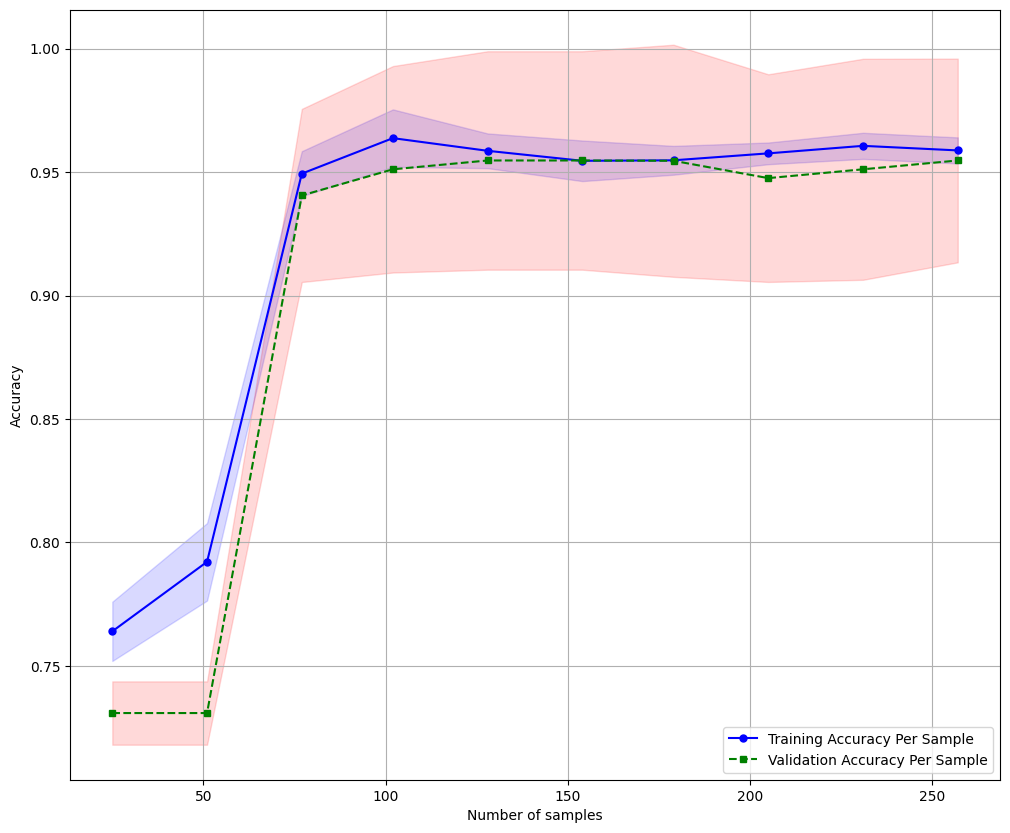

Confusion Matrix
[[ 56   8]
 [  6 101]]
Accuracy: 0.9181, Precision: 0.9266, Recall: 0.9439, F1: 0.9352, AUC: 0.9690


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('rf', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)